In [1]:
# load general tools
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_option('display.max_colwidth', 50)

In [2]:
# load magine specific tools
import magine.networks.ontology_network as nt
import magine.networks.visualization.notebooks.view as view
from magine.enrichment import load_enrichment_csv
from magine.plotting.heatmaps import heatmap_from_array
from magine.plotting.venn_diagram_maker import create_venn2
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.networks.utils import trim_sink_source_nodes
from magine.networks.subgraphs import Subgraph

In [3]:
enrichment_array = load_enrichment_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)
enrichment_array['significant'] = False
enrichment_array.loc[enrichment_array['adj_p_value']<=0.05, 'significant'] = True

In [4]:
from exp_data import exp_data

In [5]:
from magine.networks.subgraphs import Subgraph
net_sub = Subgraph(network)

NameError: name 'network' is not defined

(516, 11)
(516, 11)
(293, 11)
Number of rows went from 293 to 85
(85, 11)


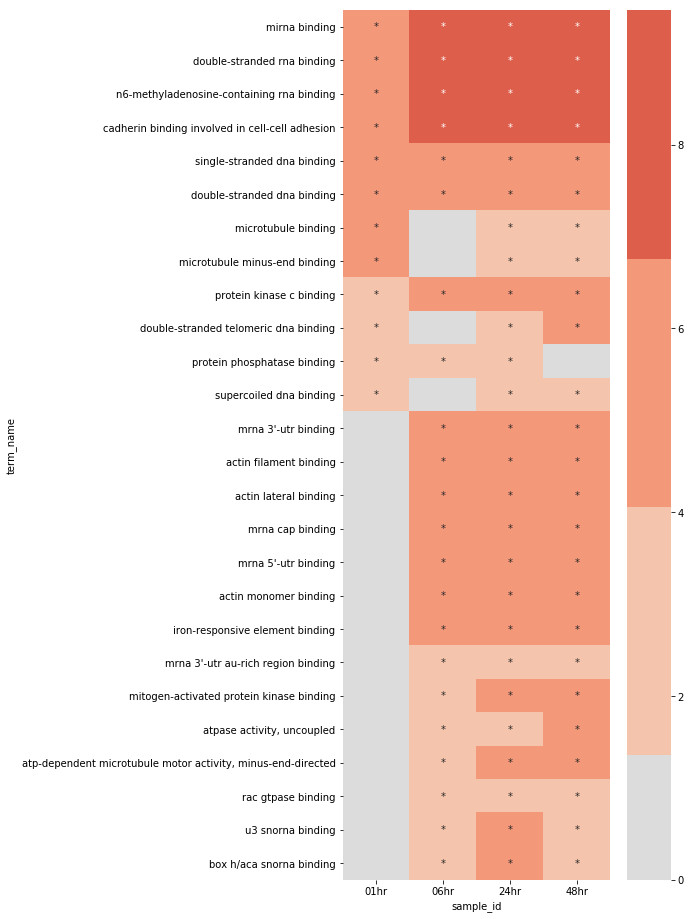

In [6]:
go_only = enrichment_array.filter_multi(
    p_value=0.05, # only sig pvalues
    combined_score=0.0, 
    db=[
#         'GO_Biological_Process_2017b',
        'GO_Molecular_Function_2017b',
#         'GO_Cellular_Component_2017b'
       ],
    category='proteomics_up'
)
print(go_only.shape)
print(go_only.shape)
at_least_2 = go_only.filter_by_minimum_sig_columns(
    index='term_name', 
    columns='sample_id',
    min_terms=3
)
print(at_least_2.shape)
at_least_2.remove_redundant(inplace=True)
print(at_least_2.shape)
heatmap_from_array(at_least_2,convert_to_log=True, div_colors=True,
                   annotate_sig=True, fig_size=(6,16));

Number of rows went from 100 to 26


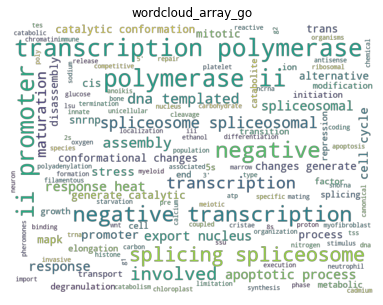

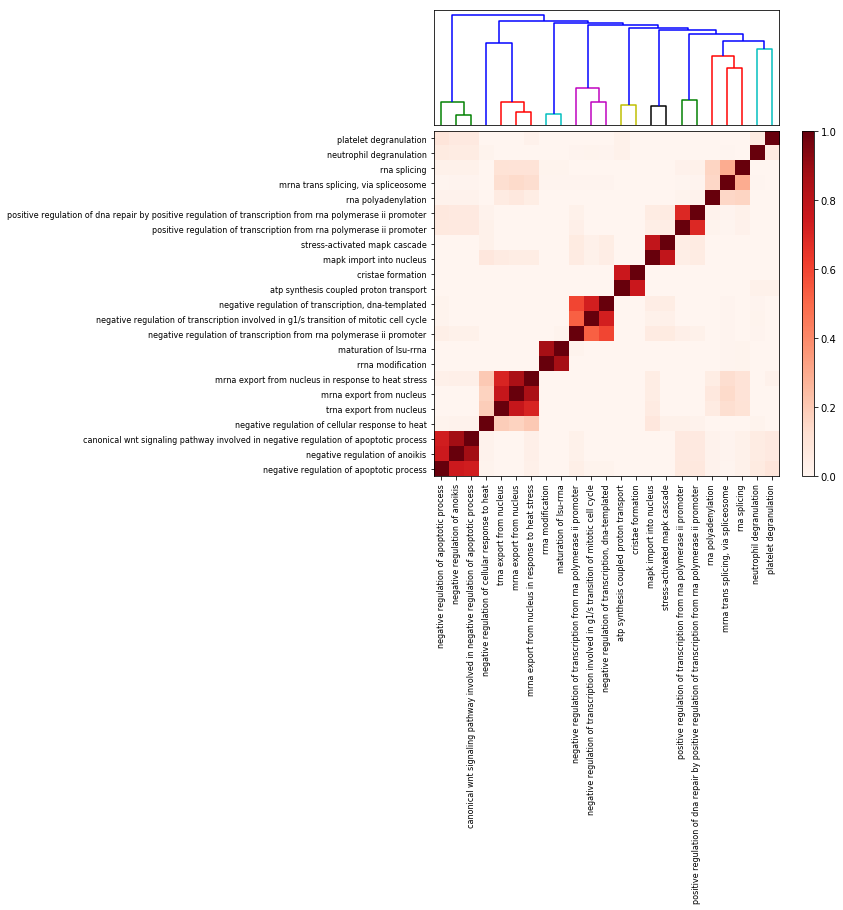

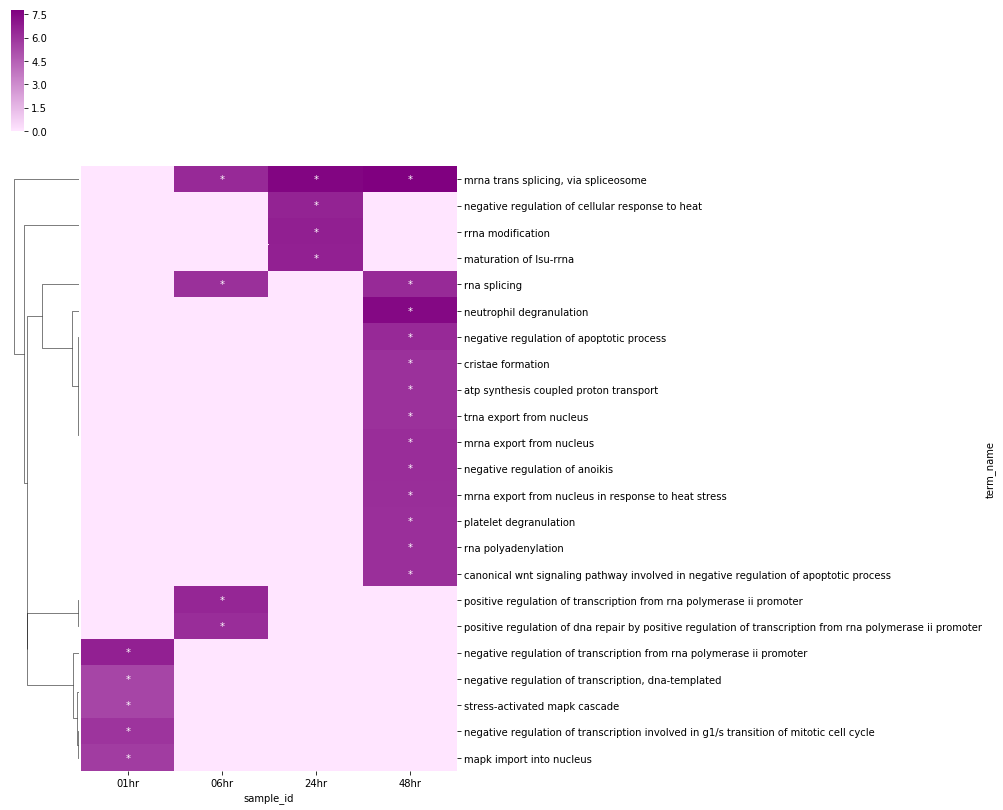

In [7]:
sig_array = enrichment_array.filter_multi(
    p_value=0.05, 
    combined_score=5.0, 
    rank=25,
    db='GO_Biological_Process_2017b',
    category='proteomics_up'
)

create_wordcloud(sig_array).plot(save_name='wordcloud_array_go');

sig_array.remove_redundant(threshold=0.9, inplace=True, level='dataframe')
sig_array.dist_matrix();
fig = heatmap_from_array(sig_array, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 14), annotate_sig=True)

fig.savefig('go_bp_cluster_enrichment.png', dpi=300, bbox_inches='tight')

Number of rows went from 278 to 278


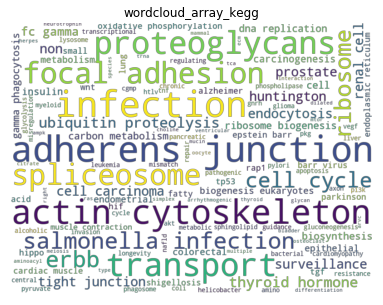

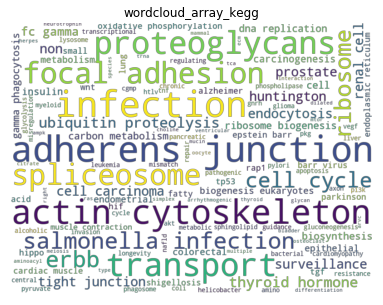

In [8]:
sig_array = enrichment_array.filter_multi(
    p_value=0.05, 
    combined_score=5.0, 
    rank=25,
    db='KEGG_2016'
)
sig_array.remove_redundant(inplace=True, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_kegg')

Number of rows went from 351 to 320


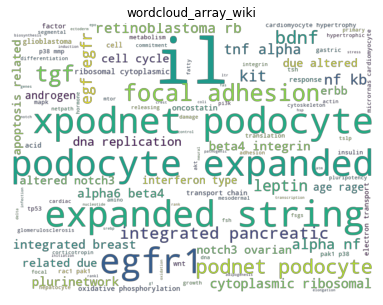

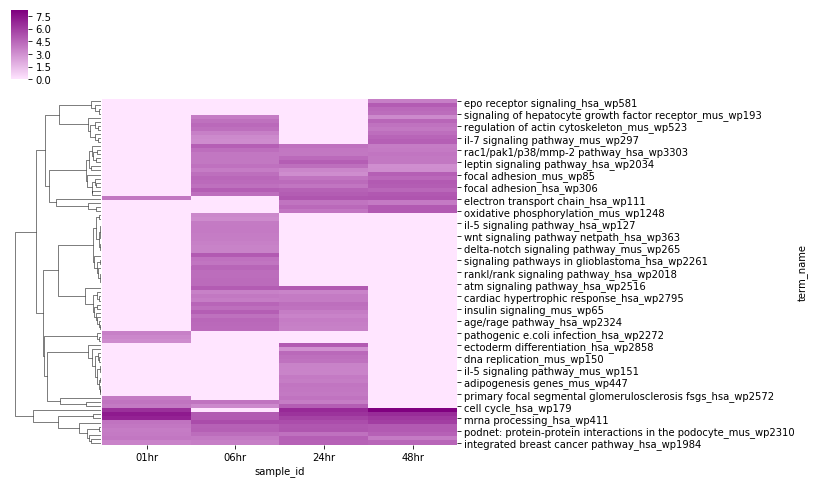

In [9]:
sig_array = enrichment_array.filter_multi(
    p_value=0.05, 
    combined_score=5.0, 
    rank=25,
    db='WikiPathways_2016'
)
sig_array.remove_redundant(inplace=True, threshold=0.7)

create_wordcloud(sig_array).plot(save_name='wordcloud_array_wiki');

fig = heatmap_from_array(sig_array, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 8))

fig.savefig('enrichment_example3.png', dpi=300, bbox_inches='tight')